In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import scatter_matrix
from sklearn.ensemble import ExtraTreesClassifier

In [24]:
train=pd.read_csv('train.csv')
clm=['Total_booking']
train_labels=pd.read_csv('train_label.csv',names=clm)

In [25]:
train=pd.concat([train, train_labels], axis = 1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [26]:
train['datetime']=train['datetime'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M'))
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [27]:
type(train.loc[0,'datetime'])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
x=train.drop(['datetime','Total_booking'],axis=1)
y=train['Total_booking']

[Text(0, 0.5, 'Bookings'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Cab Bookings from 2011 to 2012')]

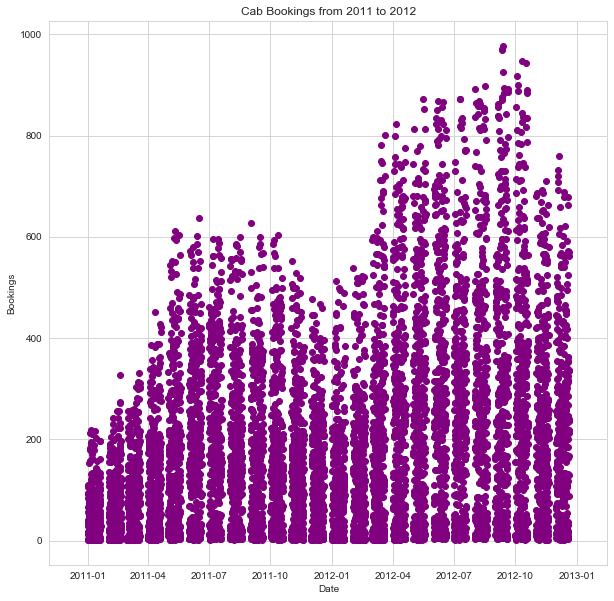

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add the x-axis and the y-axis to the plot
ax.scatter(train['datetime'],train['Total_booking'],color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Bookings",
       title="Cab Bookings from 2011 to 2012" )


### Bookings increased from 2011 to 2012

In [7]:
cats_columns=['season', 'weather']

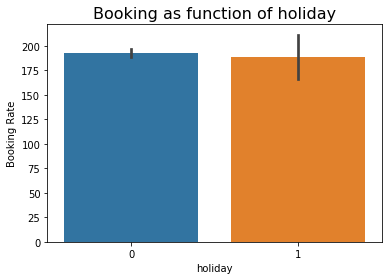

,holiday,Total_booking
0,0,193.143499
1,1,188.350806


In [8]:
sns.barplot(x='holiday', y='Total_booking', data=train)
plt.ylabel("Booking Rate")
plt.title("Booking as function of holiday", fontsize=16)

plt.show()
train[["holiday", "Total_booking"]].groupby(['holiday'], as_index=False).mean().sort_values(by='Total_booking', ascending=False)

### Whether it is a "holiday" or not, number of bookings is almost same.

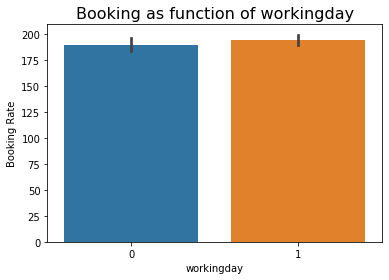

,workingday,Total_booking
1,1,194.535955
0,0,189.753592


In [9]:
sns.barplot(x='workingday', y='Total_booking', data=train)
plt.ylabel("Booking Rate")
plt.title("Booking as function of workingday", fontsize=16)

plt.show()
train[["workingday", "Total_booking"]].groupby(['workingday'], as_index=False).mean().sort_values(by='Total_booking', ascending=False)

### Whether it is a "working day" or not, number of bookings is almost same.

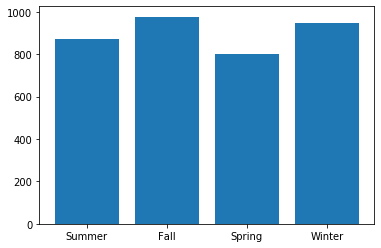

   season  Total_booking
0    Fall     237.344906
2  Summer     215.086482
3  Winter     200.666972
1  Spring     117.019663


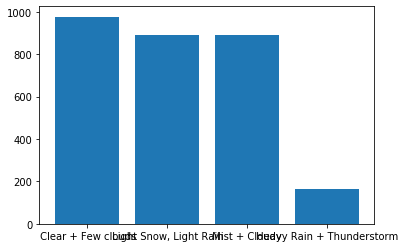

                       weather  Total_booking
0           Clear + Few clouds     206.015470
3               Mist + Cloudy      182.405975
1   Heavy Rain + Thunderstorm      164.000000
2       Light Snow, Light Rain     118.256637


In [10]:
for clm in cats_columns:
    plt.bar(train[clm], train['Total_booking'])
    plt.show()
    print(train[[clm, "Total_booking"]].groupby([clm], as_index=False).mean().sort_values(by='Total_booking', ascending=False))

### 1.  In "season" column, fall and winter has more number of bookings when compared to summer and spring.
### 2. In "weather" column, maximum number of bookings is for Clear + Few clouds.

In [53]:
numeric_columns=['temp','atemp', 'humidity','windspeed']

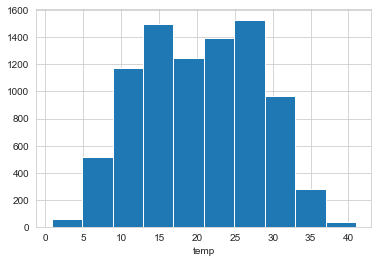

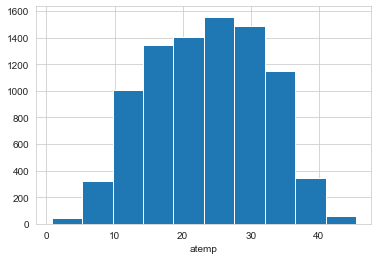

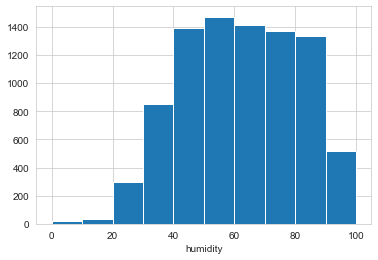

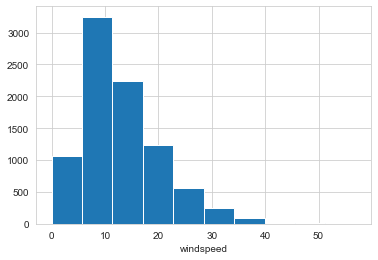

In [54]:
for clm in numeric_columns:
    plt.hist(train[clm],bins=10)
    plt.xlabel(clm)
    plt.show()

### 1. When "temperature" is between 15-25, maximum number of bookings is observed.
### 2. When "humidity" is high, maximum number of bookings is observed.
### 3. When "windspeed" is between 10-15(low windspeed), maximum number of bookings is observed.

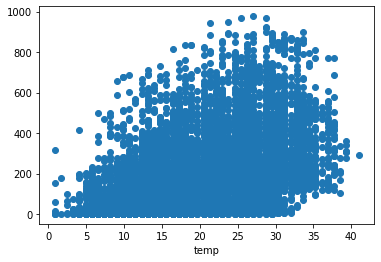

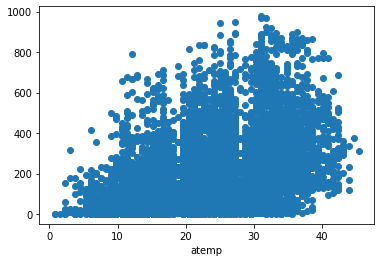

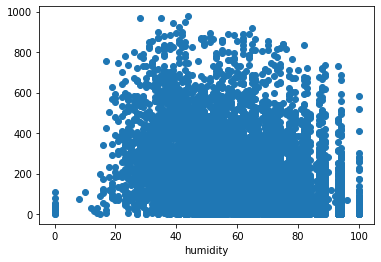

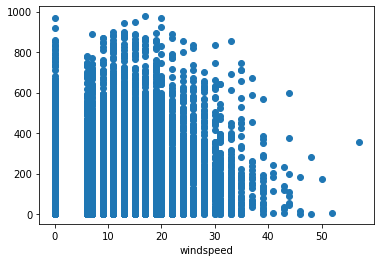

In [13]:
for clm in numeric_columns:
    plt.scatter(train[clm],train['Total_booking'])
    plt.xlabel(clm)
    plt.show()

In [14]:
columns=['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed']

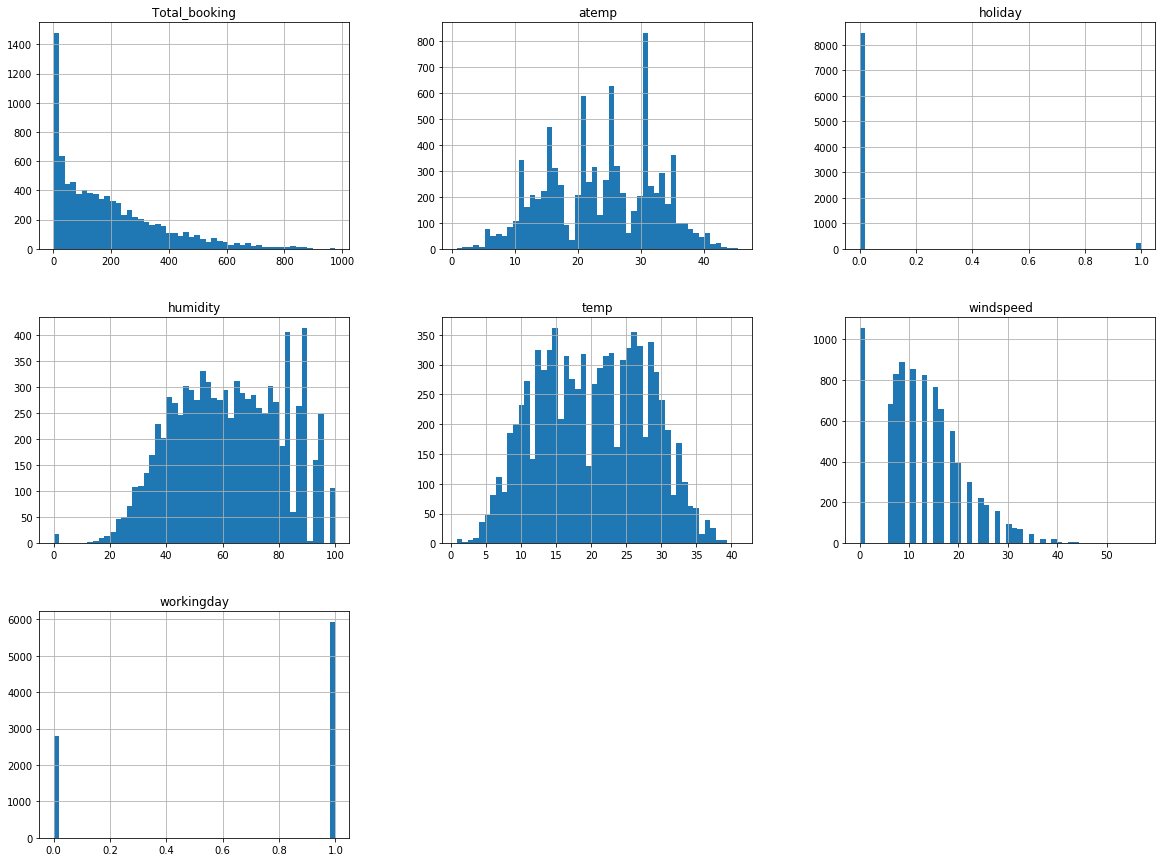

In [16]:
train.hist(bins=50, figsize=(20, 15))
plt.show()

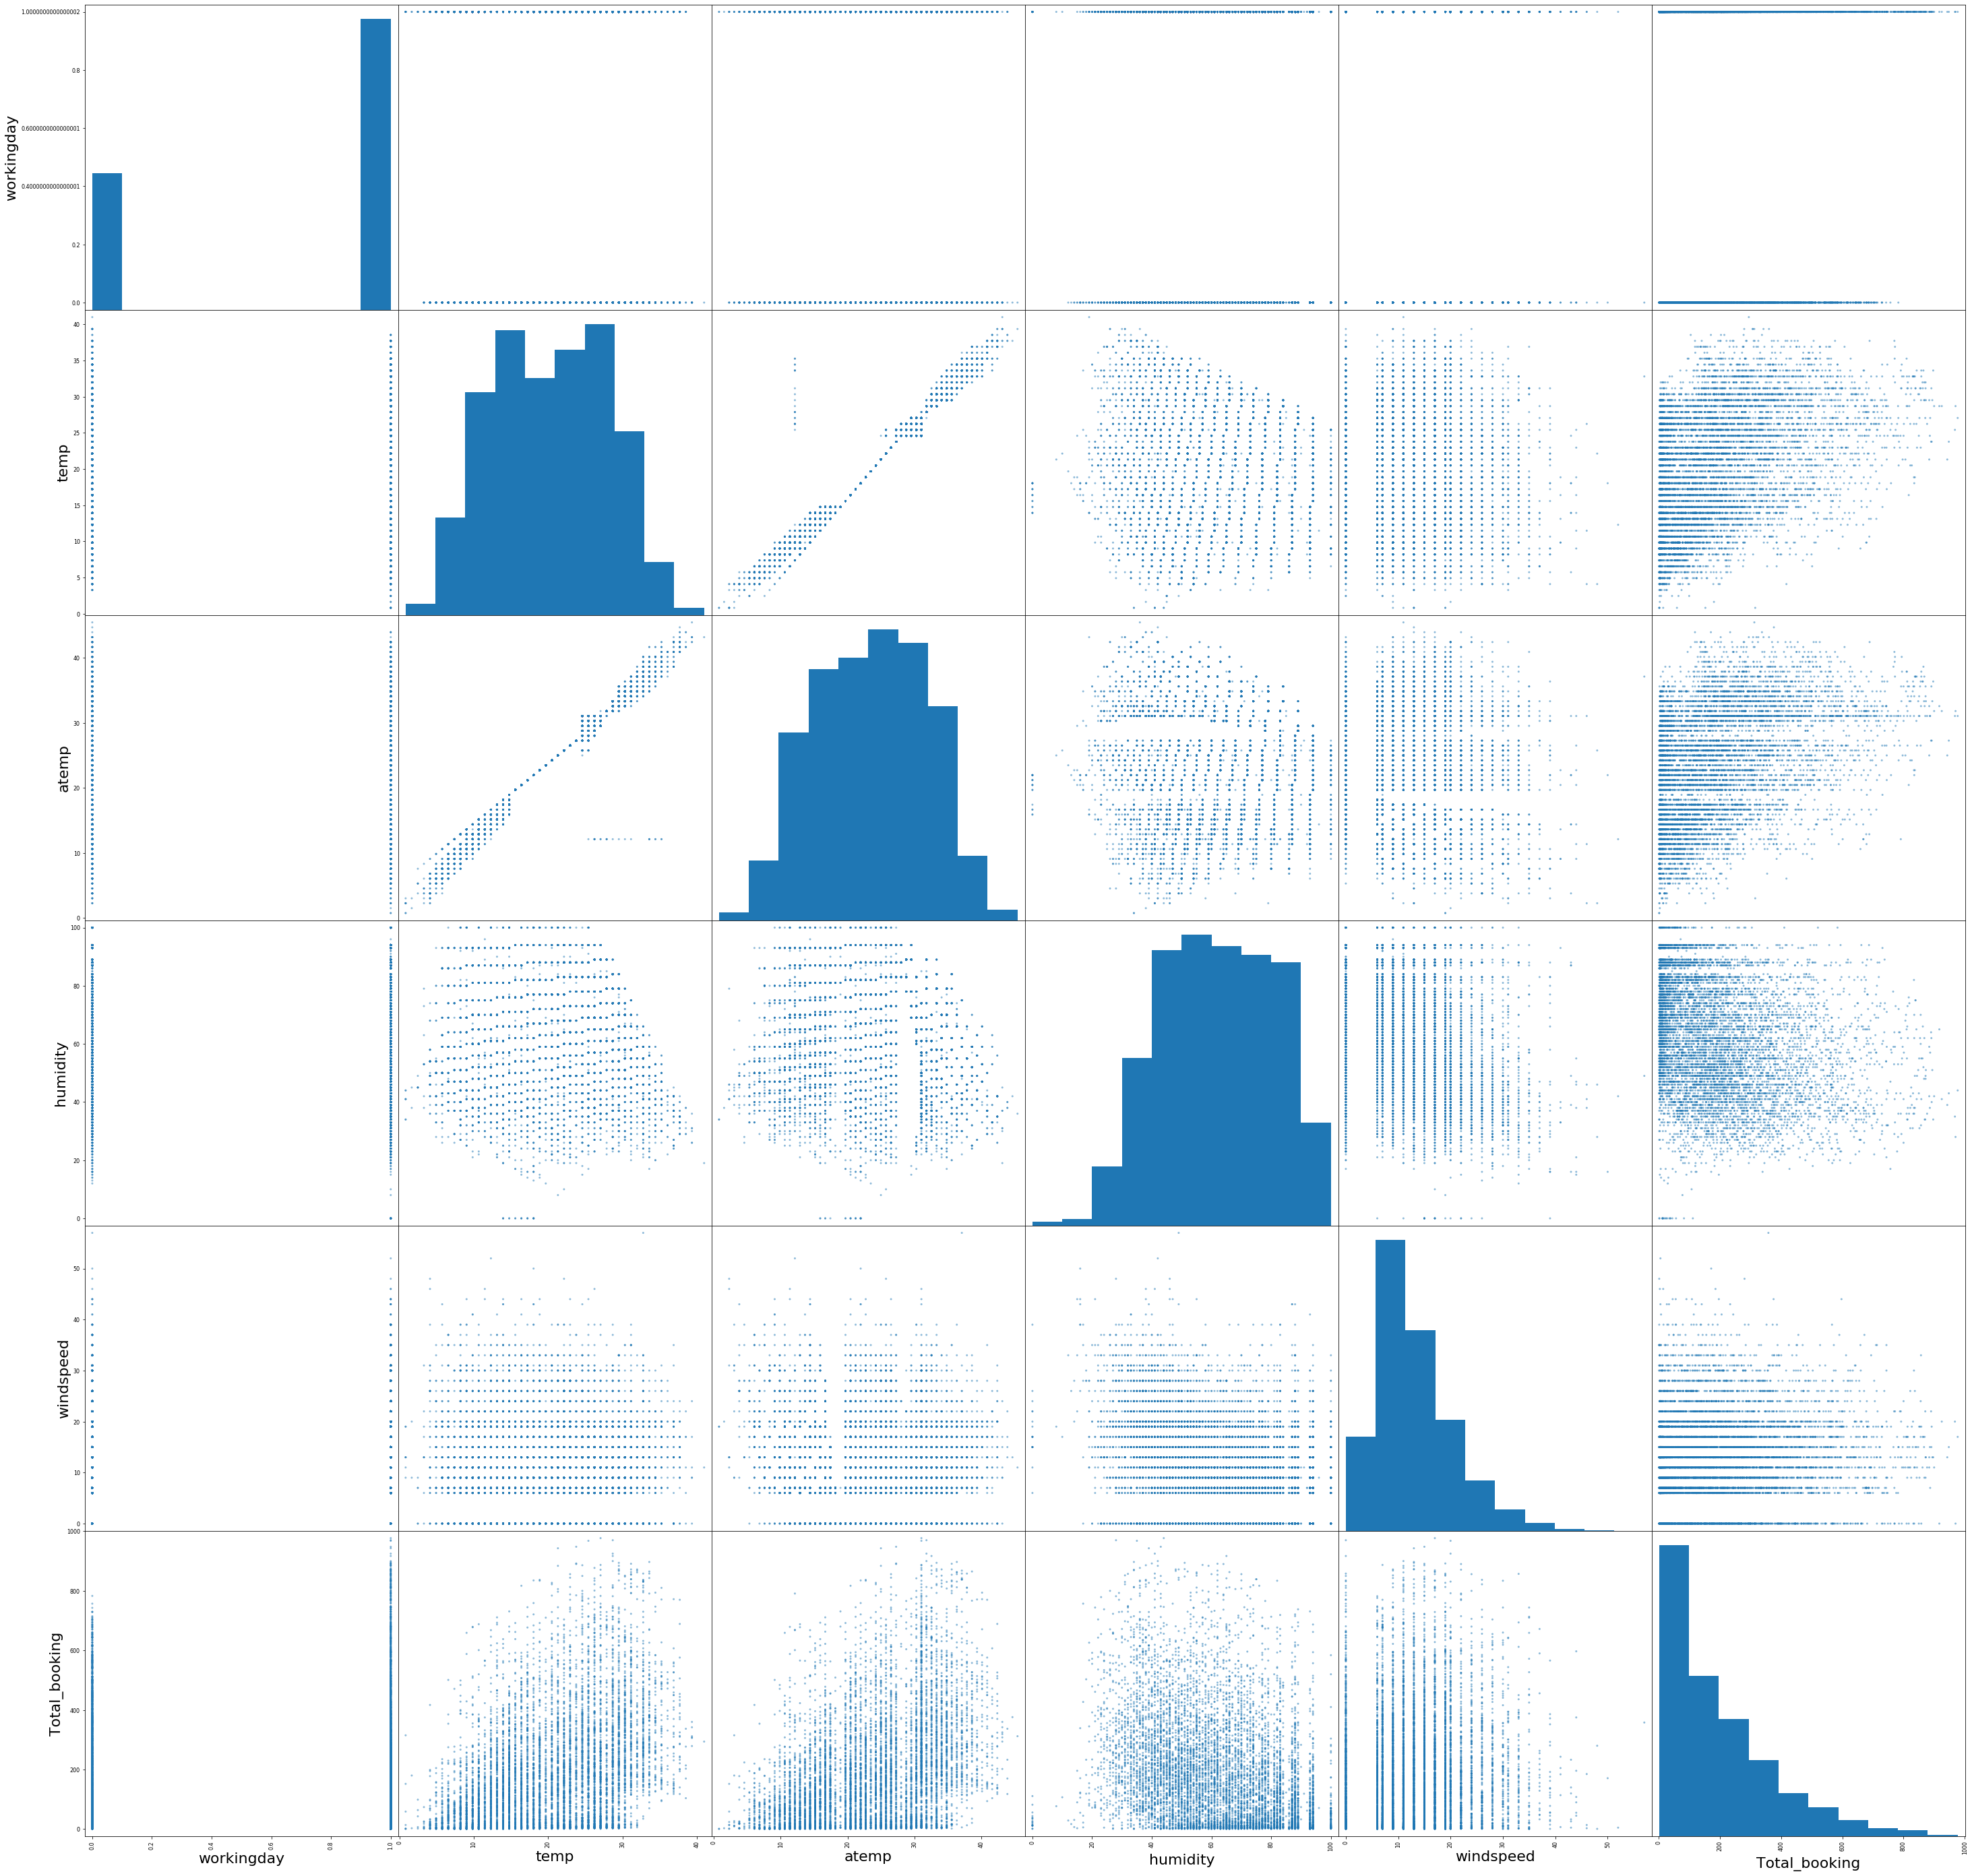

In [17]:
attributes = ['workingday', 'temp', 'atemp', 'humidity','windspeed', 'Total_booking']
plt.rcParams.update({'font.size': 22})
scatter_matrix(train[attributes], figsize = (50,50))
plt.show()

### Positive correlation between "temperature" and "total bookings".
### Negative correlation between "windspeed" and "total bookings".

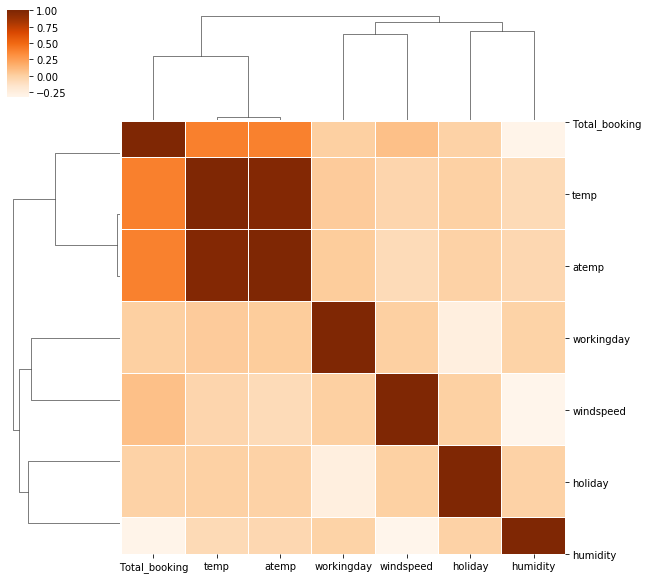

In [27]:
corrmat = train.corr() 
  
corr_graph = sns.clustermap(corrmat, cmap ="Oranges", linewidths = 0.1); 
plt.setp(corr_graph.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
corr_graph

### High correlation between 'temp' and 'atemp'. So we can use either of them.
### 'temp','atemp', 'humidity', 'windspeed' are most important columns.

## cmap colours for correlation matrix:
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r